C:\Users\lenovo\AppData\Local\Temp\ipykernel_14244\718964490.py:15: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Total.csv')


Mean Absolute Error: 4982.996522088759
R-squared Score: 0.9901871174158008


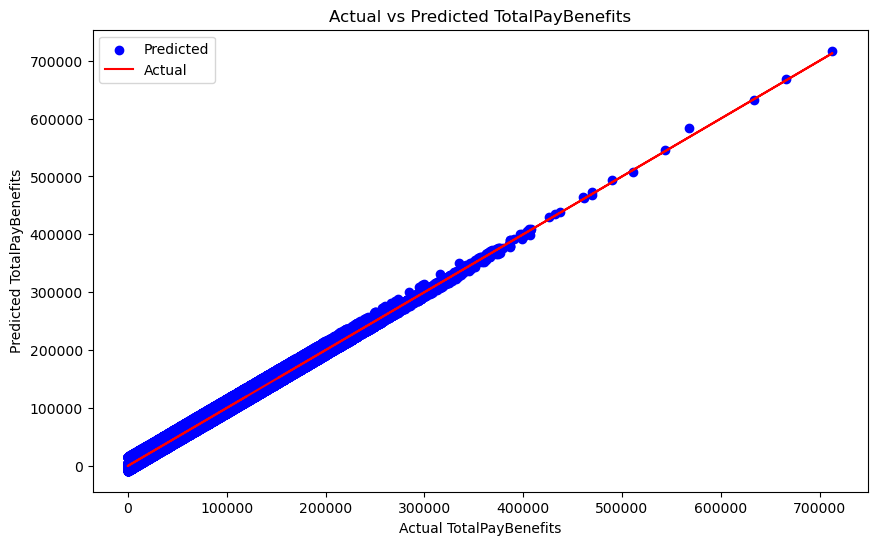

In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Optional: Set display option to show all columns
pd.set_option('display.max_columns', None)

# Step 2: Load the Dataset
df = pd.read_csv('Total.csv')

# Step 3: Data Cleaning
# Convert relevant columns to numeric and handle errors
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')
df['TotalPay'] = pd.to_numeric(df['TotalPay'], errors='coerce')
df['TotalPayBenefits'] = pd.to_numeric(df['TotalPayBenefits'], errors='coerce')

# Drop rows with missing values in critical columns
df.dropna(subset=['BasePay', 'TotalPay', 'TotalPayBenefits'], inplace=True)

# Step 4: Handle High-Cardinality Categorical Variables
# Instead of one-hot encoding, use Label Encoding for high-cardinality features like JobTitle
label_encoder = LabelEncoder()

# Apply label encoding to JobTitle (assuming it's the high-cardinality column)
df['JobTitle'] = label_encoder.fit_transform(df['JobTitle'])

# Step 5: Split the Data into Training and Test Sets
# Define features (X) and target (y)
X = df.drop(columns=['EmployeeName', 'TotalPayBenefits'])  # Drop any non-relevant columns
y = df['TotalPayBenefits']  # Target variable

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Handle Missing Values (Imputation)
# Initialize the imputer (filling NaN values with the mean of each column)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test sets
X_train_clean = imputer.fit_transform(X_train)
X_test_clean = imputer.transform(X_test)

# Step 7: Train the Linear Regression Model
model = LinearRegression()

# Train the model on the clean training data
model.fit(X_train_clean, y_train)

# Predict on the cleaned test data
y_pred = model.predict(X_test_clean)

# Step 8: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Optional: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual TotalPayBenefits')
plt.ylabel('Predicted TotalPayBenefits')
plt.title('Actual vs Predicted TotalPayBenefits')
plt.legend()
plt.show()
